In [1]:
import os
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import loompy as lp
import seaborn as sns 
import scipy
import csv
import gzip
import anndata as ad
from pathlib import Path
import glob

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 12,
    'font.family': 'DejaVu Sans',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'legend.title_fontsize': 12,
})


In [12]:
outdir='/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_publication'
adata = ad.read_h5ad(os.path.join(outdir,'gbm_scvi_neurons.h5ad'))
adata

AnnData object with n_obs × n_vars = 56716 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'source', '_scvi_batch', '_scvi_labels', 'leiden', 'Cellid', 'Tumor_Normal_annotation', 'solo', 'custom_annotation', 'Status'
    var: 'Gene', 'mt', 'n_cells_by_counts-SF11082', 'mean_counts-SF11082', 'pct_dropout_by_counts-SF11082', 'total_counts-SF11082', 'n_cells_by_counts-SF11488', 'mean_counts-SF11488', 'pct_dropout_by_counts-SF11488', 'total_counts-SF11488', 'n_cells_by_counts-SF11916', 'mean_counts-SF11916', 'pct_dropout_by_counts-SF11916', 'total_counts-SF11916', 'n_cells_by_counts-SF12382', 'mean_counts-SF12382', 'pct_dropout_by_counts-SF12382', 'total_counts-SF12382', 'n_cells_by_counts-SF2777', 'mean_counts-SF2777', 'pct_dropout_by_counts-SF2777', 'total_counts-SF2777', 'n_cells_by_counts-SF2979', 'mean_counts-SF2979', 'pct_dropout_by_counts-SF2979', 'total_counts-SF2979', 'n_cells_by_counts-SF2990', 'mean_counts-SF2990', 'pct_dropout

In [49]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,source,_scvi_batch,_scvi_labels,leiden,Cellid,Tumor_Normal_annotation,solo,custom_annotation,Status,Stage,Pair#,Sex,Age
CellID,,,,,,,,,,,,,,,,,,
AAACCCAAGGGATCAC-1-SF2777,468,468,579.0,9.0,1.554404,SF2777,0,0,0,AAACCCAAGGGATCAC-1,Tumor,singlet,Tumor,Recurrent,Primary,11,F,29.0
AAACCCAGTCGATTTG-1-SF2777,311,311,402.0,4.0,0.995025,SF2777,0,0,6,AAACCCAGTCGATTTG-1,Tumor,singlet,Tumor,Recurrent,Primary,11,F,29.0
AAACCCAGTCGTCAGC-1-SF2777,864,864,1518.0,3.0,0.197628,SF2777,0,0,6,AAACCCAGTCGTCAGC-1,Tumor,singlet,Tumor,Recurrent,Primary,11,F,29.0
AAACCCAGTTGTAAAG-1-SF2777,632,632,891.0,12.0,1.346801,SF2777,0,0,0,AAACCCAGTTGTAAAG-1,Tumor,singlet,Tumor,Recurrent,Primary,11,F,29.0
AAACCCATCTATCGGA-1-SF2777,849,849,1338.0,43.0,3.213752,SF2777,0,0,0,AAACCCATCTATCGGA-1,Tumor,singlet,Tumor,Recurrent,Primary,11,F,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCATTATCC-1-SF9494,2027,2027,4502.0,0.0,0.000000,SF9494,15,0,2,TTTGGTTTCATTATCC-1,Normal,singlet,Oligodendrocytes,Recurrent,Recurrent,27,M,64.0
TTTGGTTTCCCTCGTA-1-SF9494,1972,1972,4071.0,0.0,0.000000,SF9494,15,0,2,TTTGGTTTCCCTCGTA-1,Normal,singlet,Oligodendrocytes,Recurrent,Recurrent,27,M,64.0
TTTGTTGTCAGACAAA-1-SF9494,2340,2340,5272.0,0.0,0.000000,SF9494,15,0,13,TTTGTTGTCAGACAAA-1,Tumor,singlet,Tumor,Recurrent,Recurrent,27,M,64.0


In [ ]:
metadata = pd.read_csv(os.path.join(outdir,'gbm_singlet_obs.xlsx'),index_col=0)
metadata

In [ ]:
adata.obs= adata.obs.merge(metadata[['Stage', 'Pair#', 'Sex', 'Age']],how='left', on='CellID')

In [30]:
adata_singlet = adata[adata.obs['solo'] == 'singlet']
adata_singlet

View of AnnData object with n_obs × n_vars = 50738 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'source', '_scvi_batch', '_scvi_labels', 'leiden', 'Cellid', 'Tumor_Normal_annotation', 'solo', 'custom_annotation', 'Status', 'Stage', 'Pair#', 'Sex', 'Age'
    var: 'Gene', 'mt', 'n_cells_by_counts-SF11082', 'mean_counts-SF11082', 'pct_dropout_by_counts-SF11082', 'total_counts-SF11082', 'n_cells_by_counts-SF11488', 'mean_counts-SF11488', 'pct_dropout_by_counts-SF11488', 'total_counts-SF11488', 'n_cells_by_counts-SF11916', 'mean_counts-SF11916', 'pct_dropout_by_counts-SF11916', 'total_counts-SF11916', 'n_cells_by_counts-SF12382', 'mean_counts-SF12382', 'pct_dropout_by_counts-SF12382', 'total_counts-SF12382', 'n_cells_by_counts-SF2777', 'mean_counts-SF2777', 'pct_dropout_by_counts-SF2777', 'total_counts-SF2777', 'n_cells_by_counts-SF2979', 'mean_counts-SF2979', 'pct_dropout_by_counts-SF2979', 'total_counts-SF2979', 'n_cells_by_counts-SF2

In [32]:
adata_singlet.obs['custom_annotation'] = adata_singlet.obs['custom_annotation'].cat.add_categories(['Intermediate'])

adata_singlet.obs.loc[adata_singlet.obs['custom_annotation'] == 'Transitioning', 'custom_annotation'] = 'Intermediate'


/tmp/ipykernel_3129687/3328679633.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_singlet.obs['custom_annotation'] = adata_singlet.obs['custom_annotation'].cat.add_categories(['Intermediate'])


In [47]:
ct = pd.crosstab(adata_singlet.obs["source"],adata_singlet.obs["custom_annotation"])
ct

custom_annotation,Immune cells,Neurons,Oligodendrocytes,Tumor,Intermediate
source,,,,,
SF2777,73,209,84,3133,6
SF2979,617,3,424,2776,93
SF2990,263,60,52,1371,8
SF3073,1148,272,950,591,4
SF3076,385,13,404,2078,9
SF3243,328,9,0,1725,3
SF3391,451,90,39,5652,9
SF3448,507,1200,2166,476,15
SF11916,31,45,1,961,1


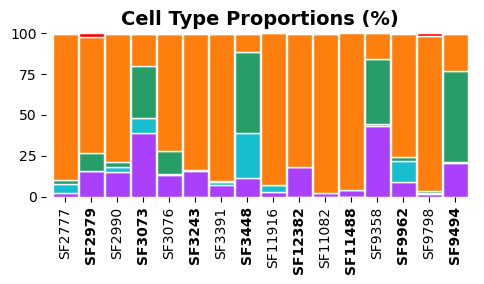

In [36]:

# Normalize counts to proportions
ct_props = ct.div(ct.sum(axis=1), axis=0)

# Define colors for each category
color_dict = {
    'Tumor': '#ff7f0eff',
    'Intermediate': '#ff0000ff',
    'Neurons': '#17becfff',
    'Immune cells': '#aa40fcff',
    'Oligodendrocytes': '#279e68ff'
}

# Plot
fig, ax = plt.subplots(figsize=(5, 3), facecolor='white')

ct_props.plot(
    kind='bar',
    stacked=True,
    color=[color_dict[col] for col in ct.columns],
    ax=ax,
    width=0.95,          # Thin space between bars
    edgecolor='white'    # White separator between segments
)

# Style
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0', '25', '50', '75', '100'])
ax.set_xlabel('')
for i, label in enumerate(ax.get_xticklabels()):
    if i % 2 == 0:
        label.set_fontweight('normal')  # odd index (0-based) labels normal
    else:
        label.set_fontweight('bold') 
ax.set_title('Cell Type Proportions (%)')
ax.grid(False)
ax.legend_.remove()  # Remove legend

# Remove border frame
for spine in ax.spines.values():
    spine.set_visible(False)

#fig.savefig(os.path.join(outdir,"cell_type_proportions.png"), dpi=300, bbox_inches='tight', transparent=True)



plt.tight_layout()
plt.show()




In [40]:
from sklearn.decomposition import PCA

# Run PCA on scVI latent space
scvi_latent = adata_singlet.obsm["X_scVI"]
pca = PCA(n_components=30)
X_pca = pca.fit_transform(scvi_latent)

# Store it back in AnnData
adata_singlet.obsm["X_pca"] = X_pca


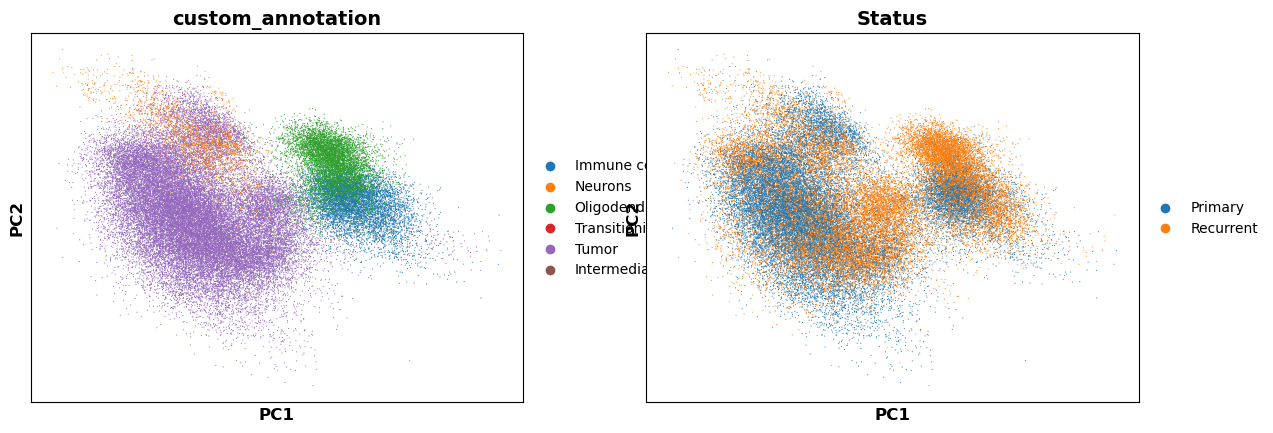

In [50]:
sc.pl.pca(adata_singlet, color=["custom_annotation",'Status'])

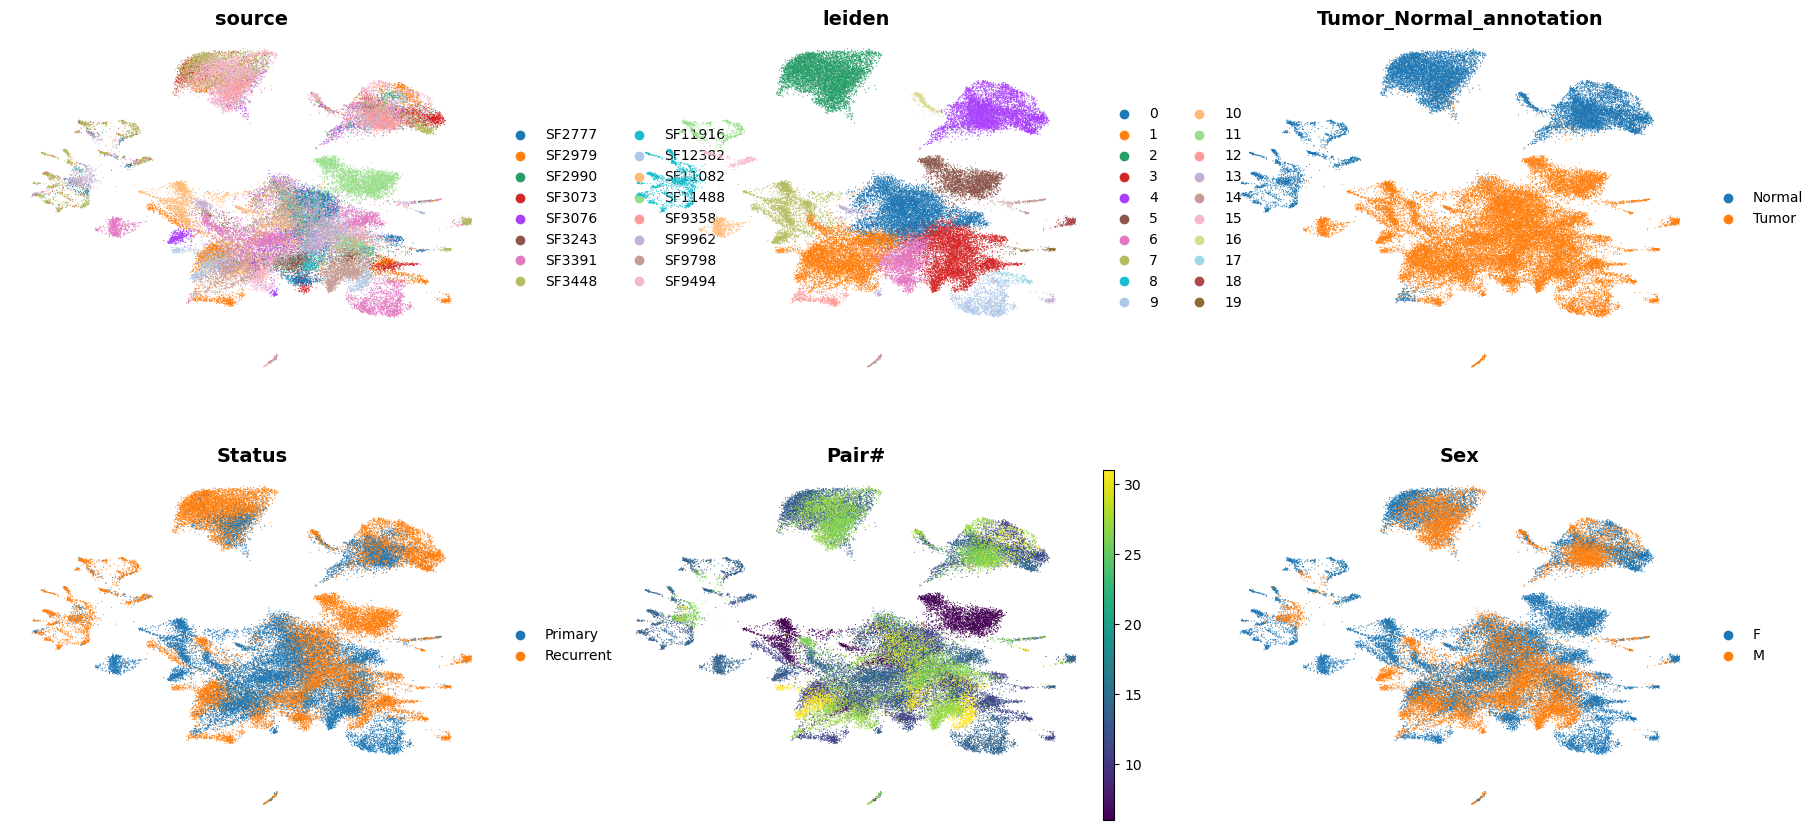

In [38]:
#sc.tl.umap(adata, min_dist=0.5,random_state =0)
sc.pl.umap(
    adata_singlet,
    color=["source", "leiden",'Tumor_Normal_annotation','Status','Pair#','Sex'],
    frameon=False,
    ncols=3,
)

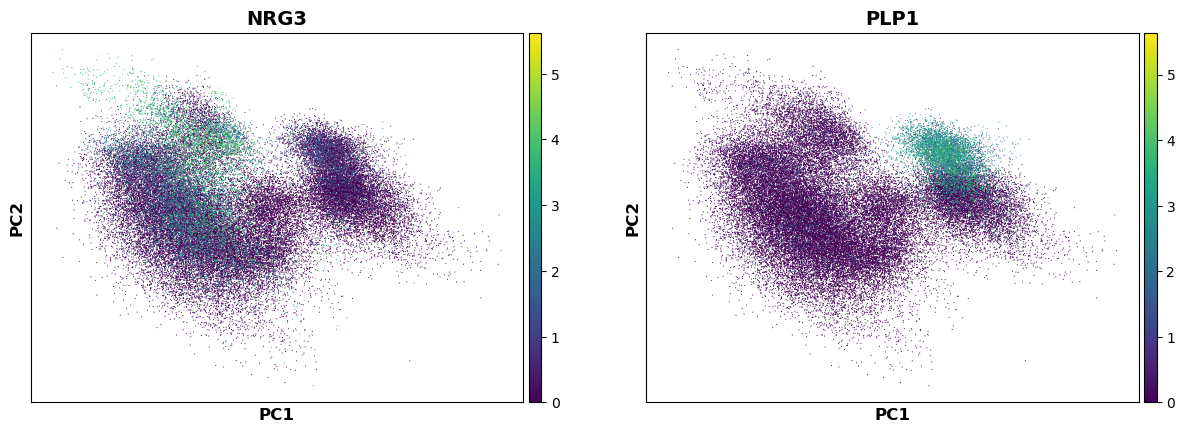

In [52]:
sc.pl.pca(adata_singlet, color=['NRG3','PLP1'])